<a href="https://colab.research.google.com/github/AyushiBhansali/Diabetes-Predictor/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction

## **Exploratory Data Analysis**

In [4]:
# Importing the packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [6]:
# Reading the dataset
df = pd.read_csv('diabetes.csv')

In [7]:
# Printing the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


#### The dataset consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [9]:
# Descriptive statistics of the data set
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df.shape)

Dataset shape: (2000, 9)


In [11]:
# Print the distribution of the Outcome variable.
df["Outcome"].value_counts()*100/len(df)

0    65.8
1    34.2
Name: Outcome, dtype: float64

In [12]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

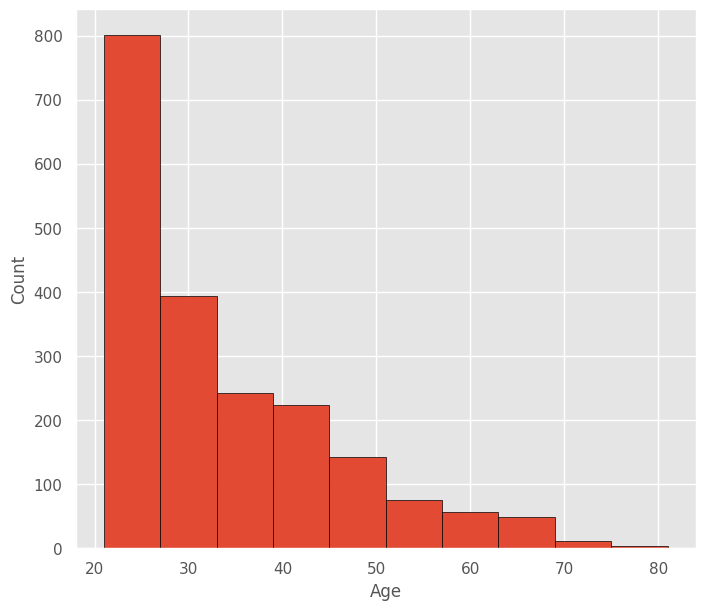

In [13]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df["Age"].hist(edgecolor = "black");

In [14]:
print("Max Age: " + str(df["Age"].max()) +','+ " Min Age: " + str(df["Age"].min()))

Max Age: 81, Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

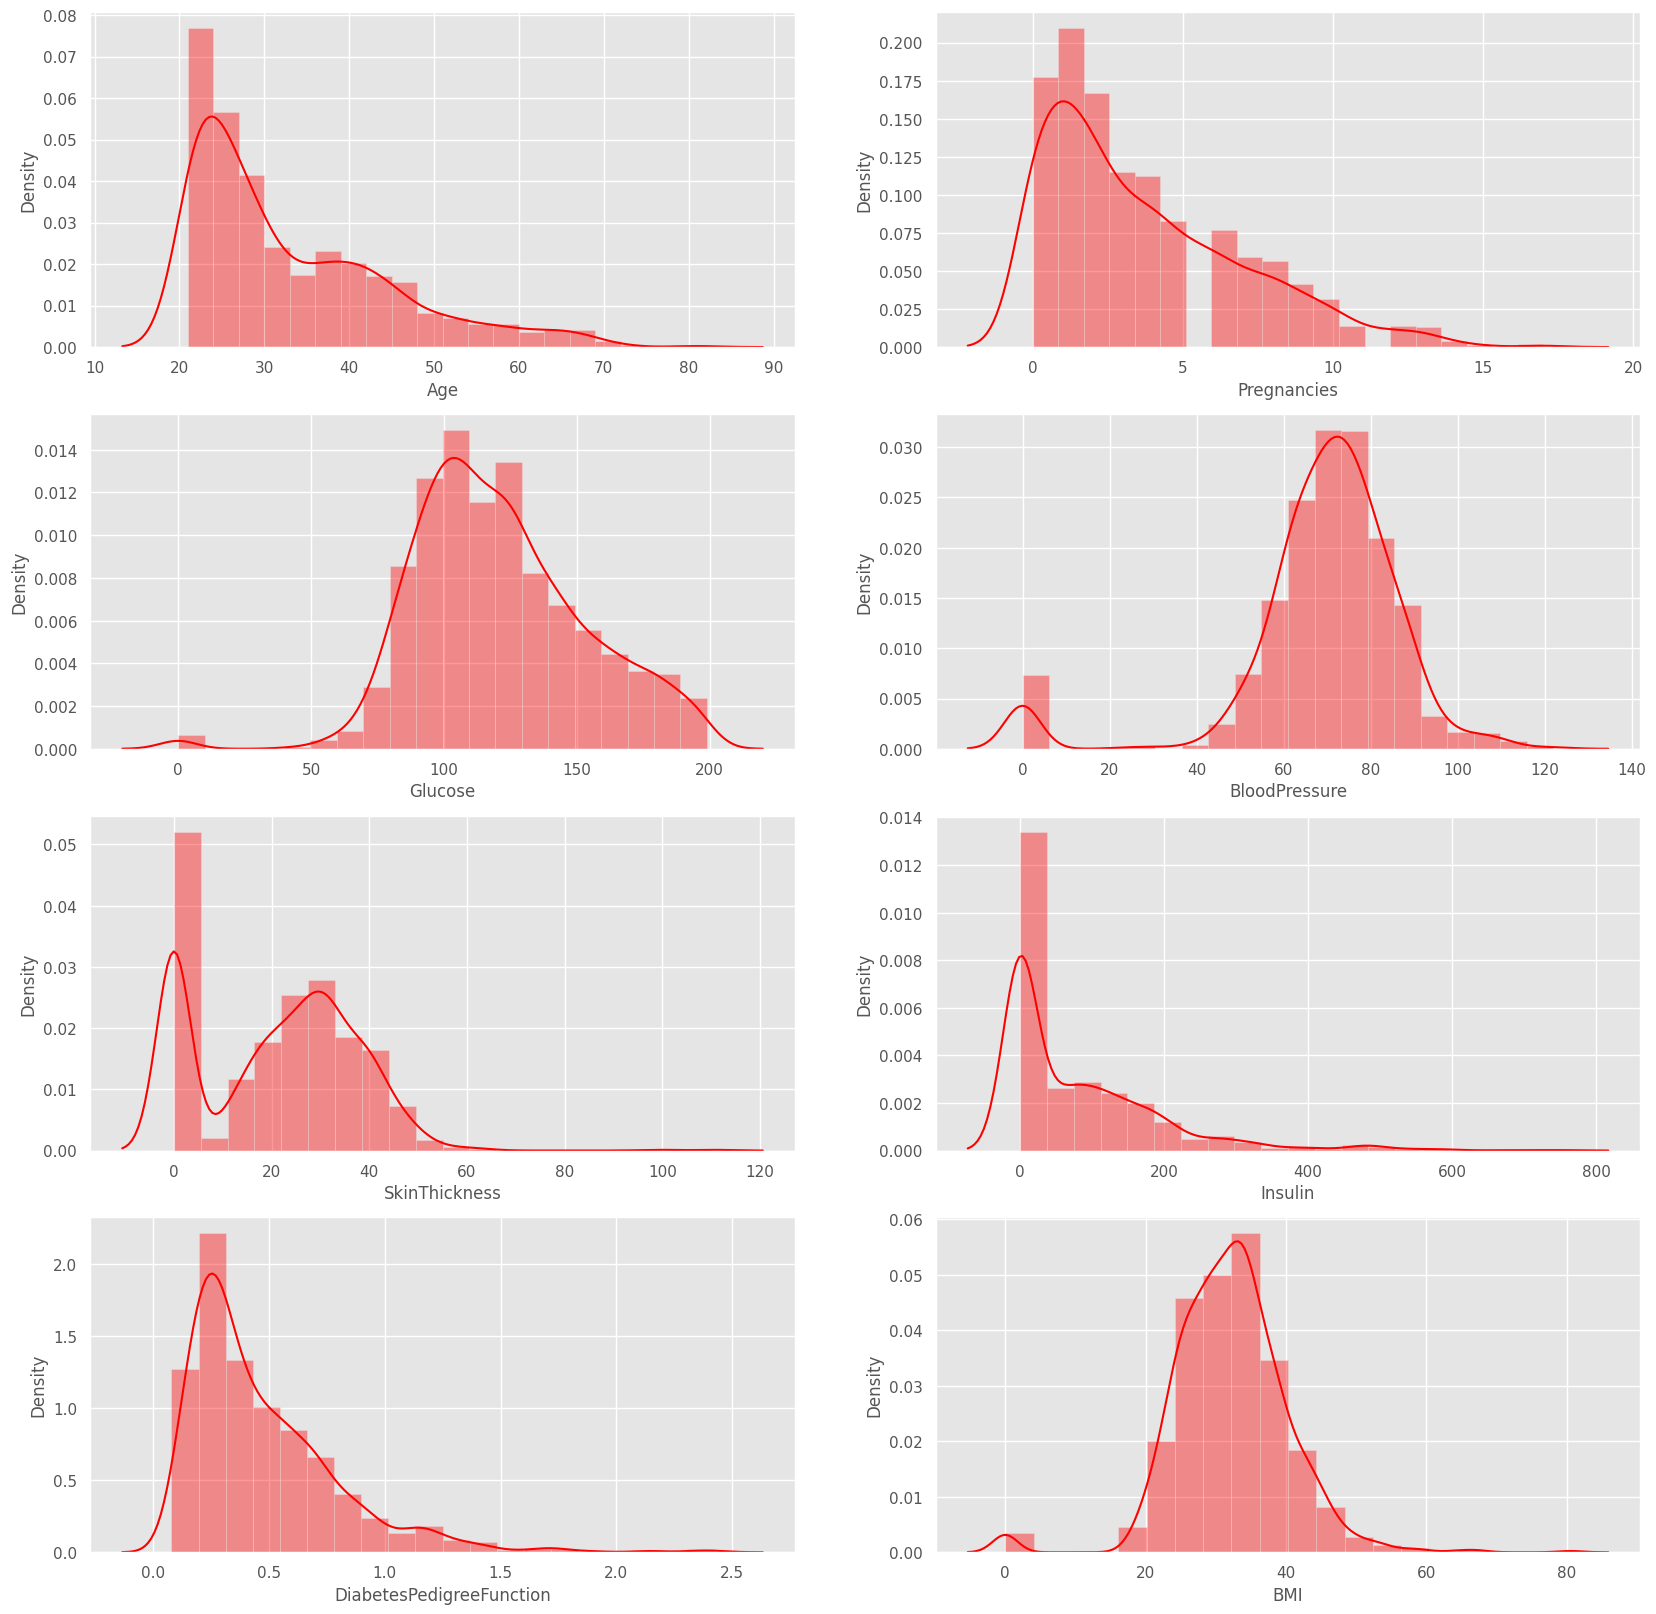

In [15]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Age, bins = 20, ax=ax[0,0], color="red")
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1], color="red")
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0], color="red")
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1], color="red")
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0], color="red")
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="red")
sns.distplot(df.BMI, bins = 20, ax=ax[3,1], color="red")

In [16]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.168693
1,4.732456


In [17]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.081307
1,36.956140


In [18]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [19]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,70.563830
1,98.897661


In [20]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,600


In [21]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,110.586626
1,141.568713


In [22]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [23]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.567477
1,35.320468


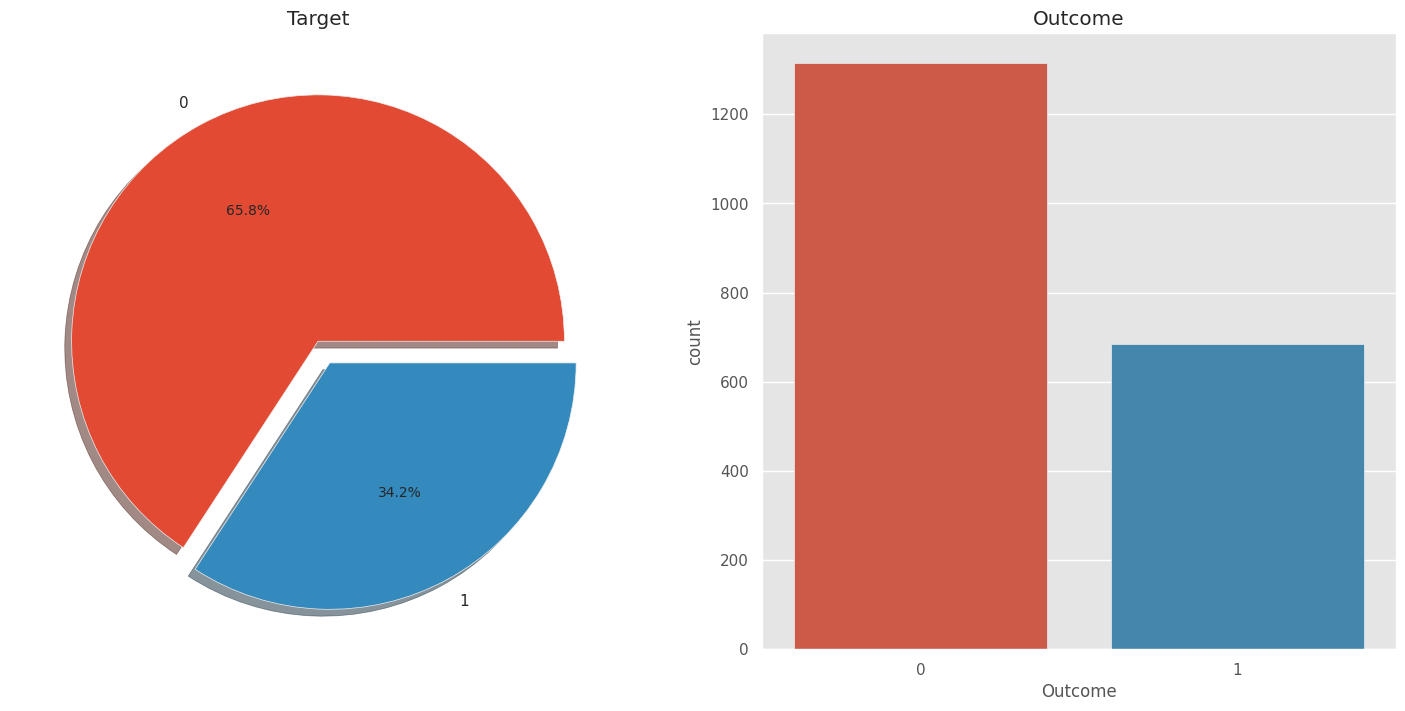

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns, and set the figure size
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot a pie chart for the distribution of 'Outcome' values
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')  # Remove the y-axis label

# Plot a count plot for the 'Outcome' column using Seaborn
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

# Show the plots
plt.show()


In [25]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


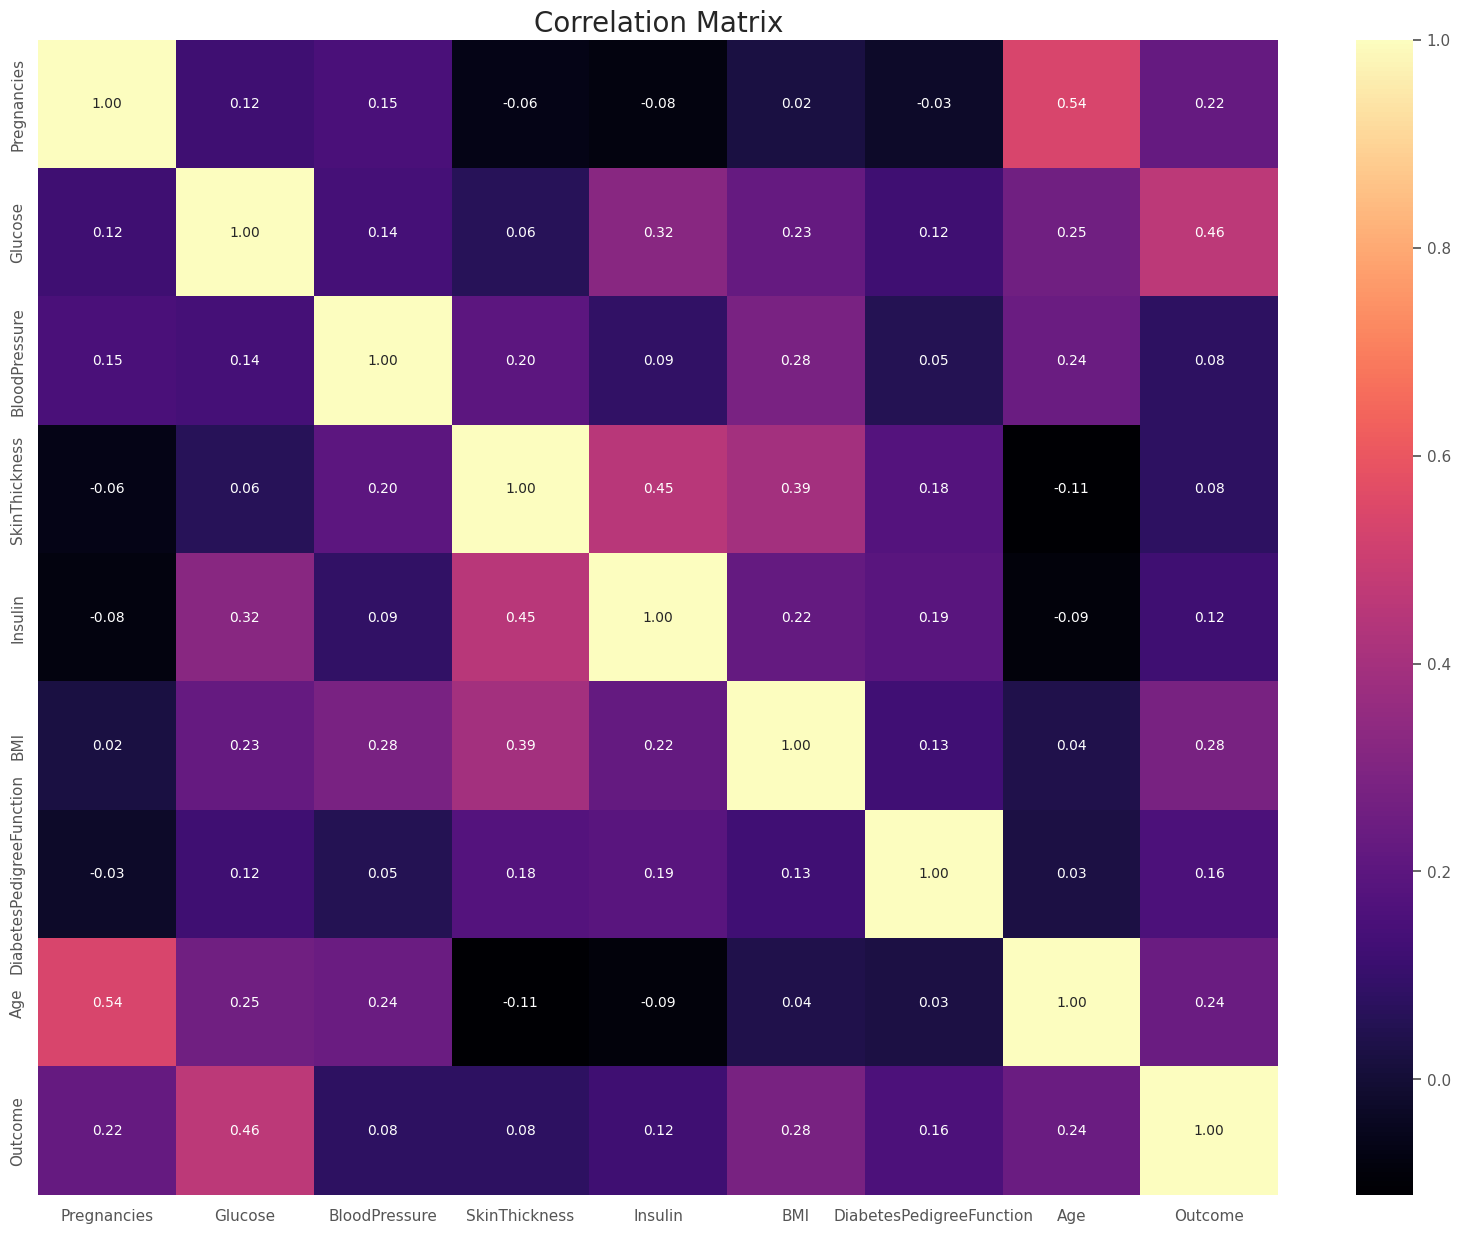

In [26]:
# Correlation matrix of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap ='magma' )
ax.set_title("Correlation Matrix", fontsize=20)
#plt.savefig("corr.png", dpi=400)
plt.show()

## **Data Preprocessing**

## Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by NaN:

In [27]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [29]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

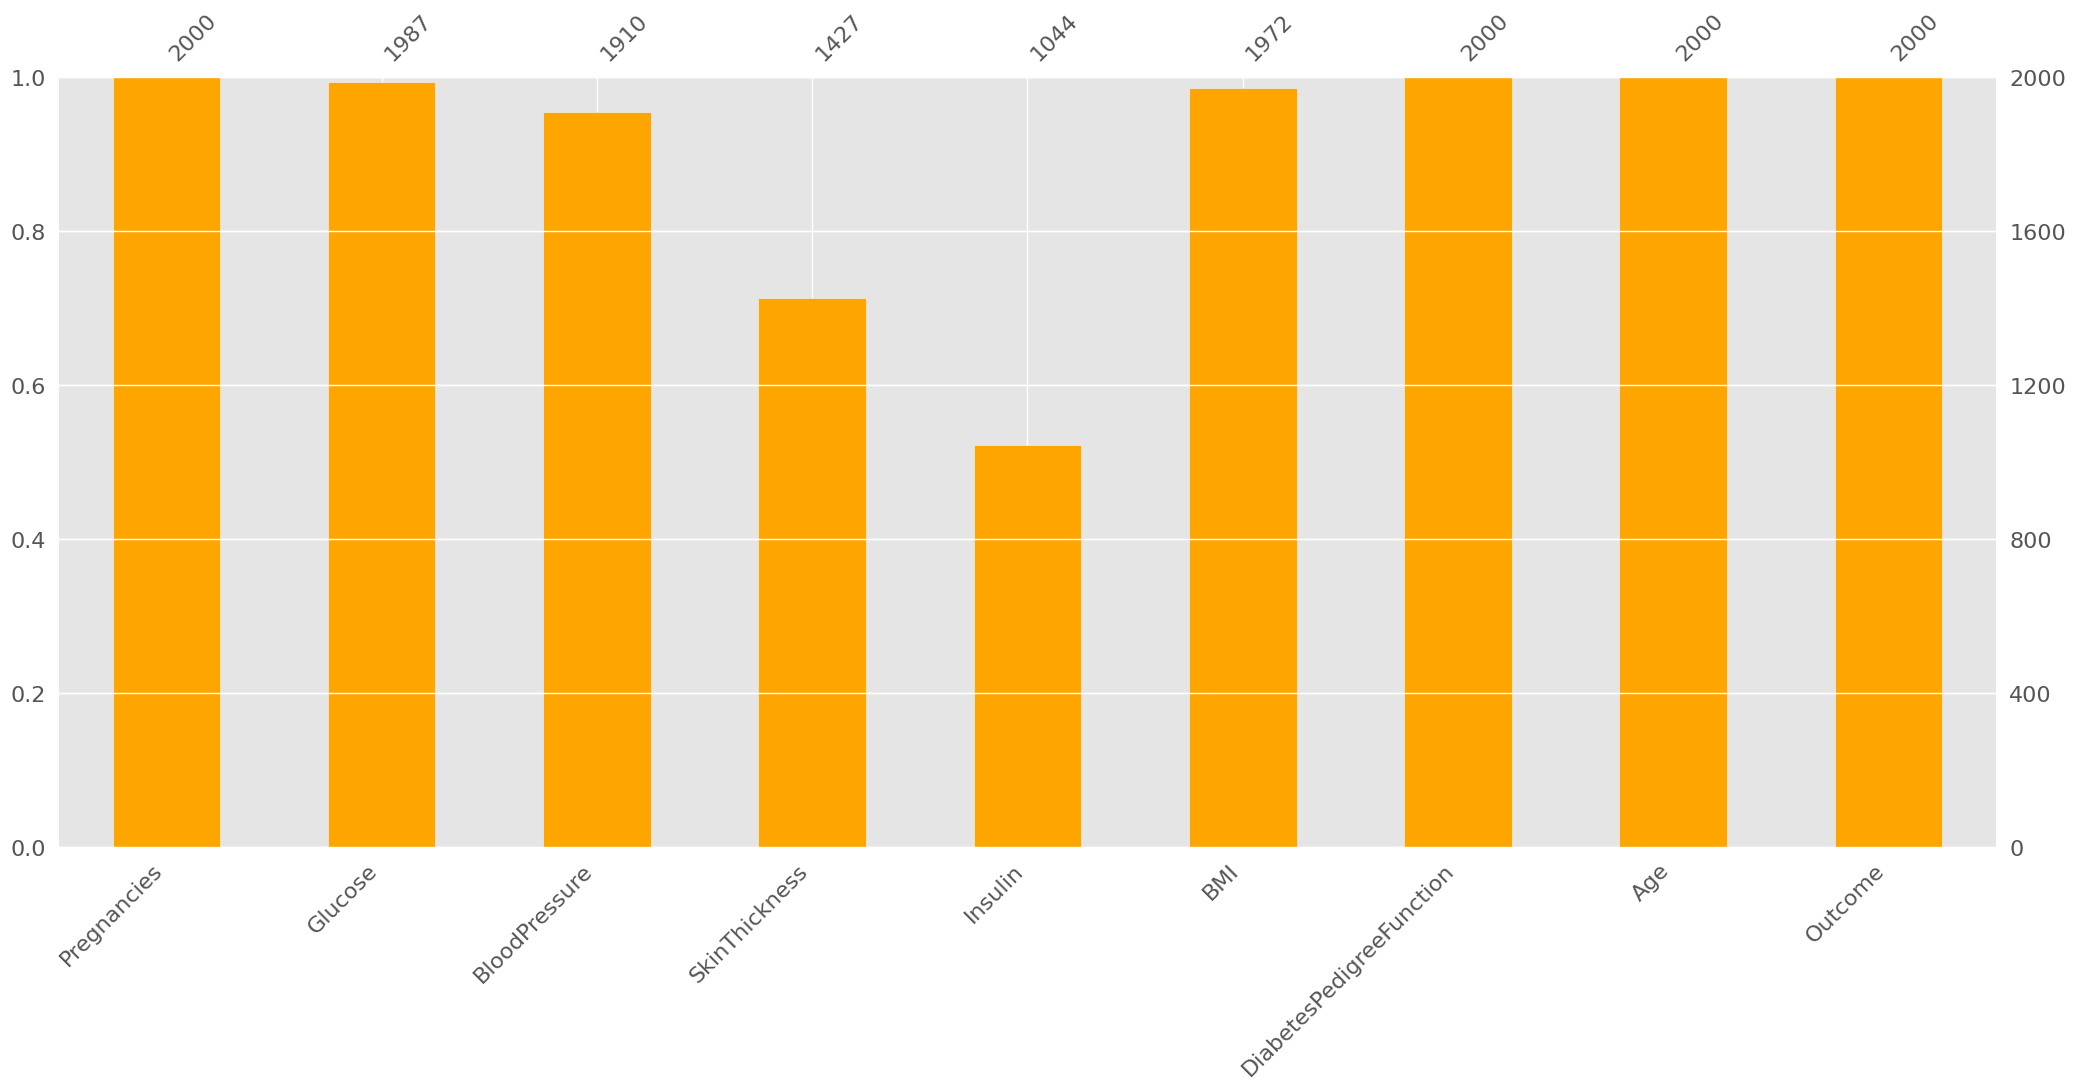

In [30]:
# Visualizing the missing observations using the missingno library
import missingno as msno
msno.bar(df, color="orange");

In [31]:
# The missing values will be filled with the median values of each variable
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [32]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [34]:
# Number of missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Pair plot for clean data

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

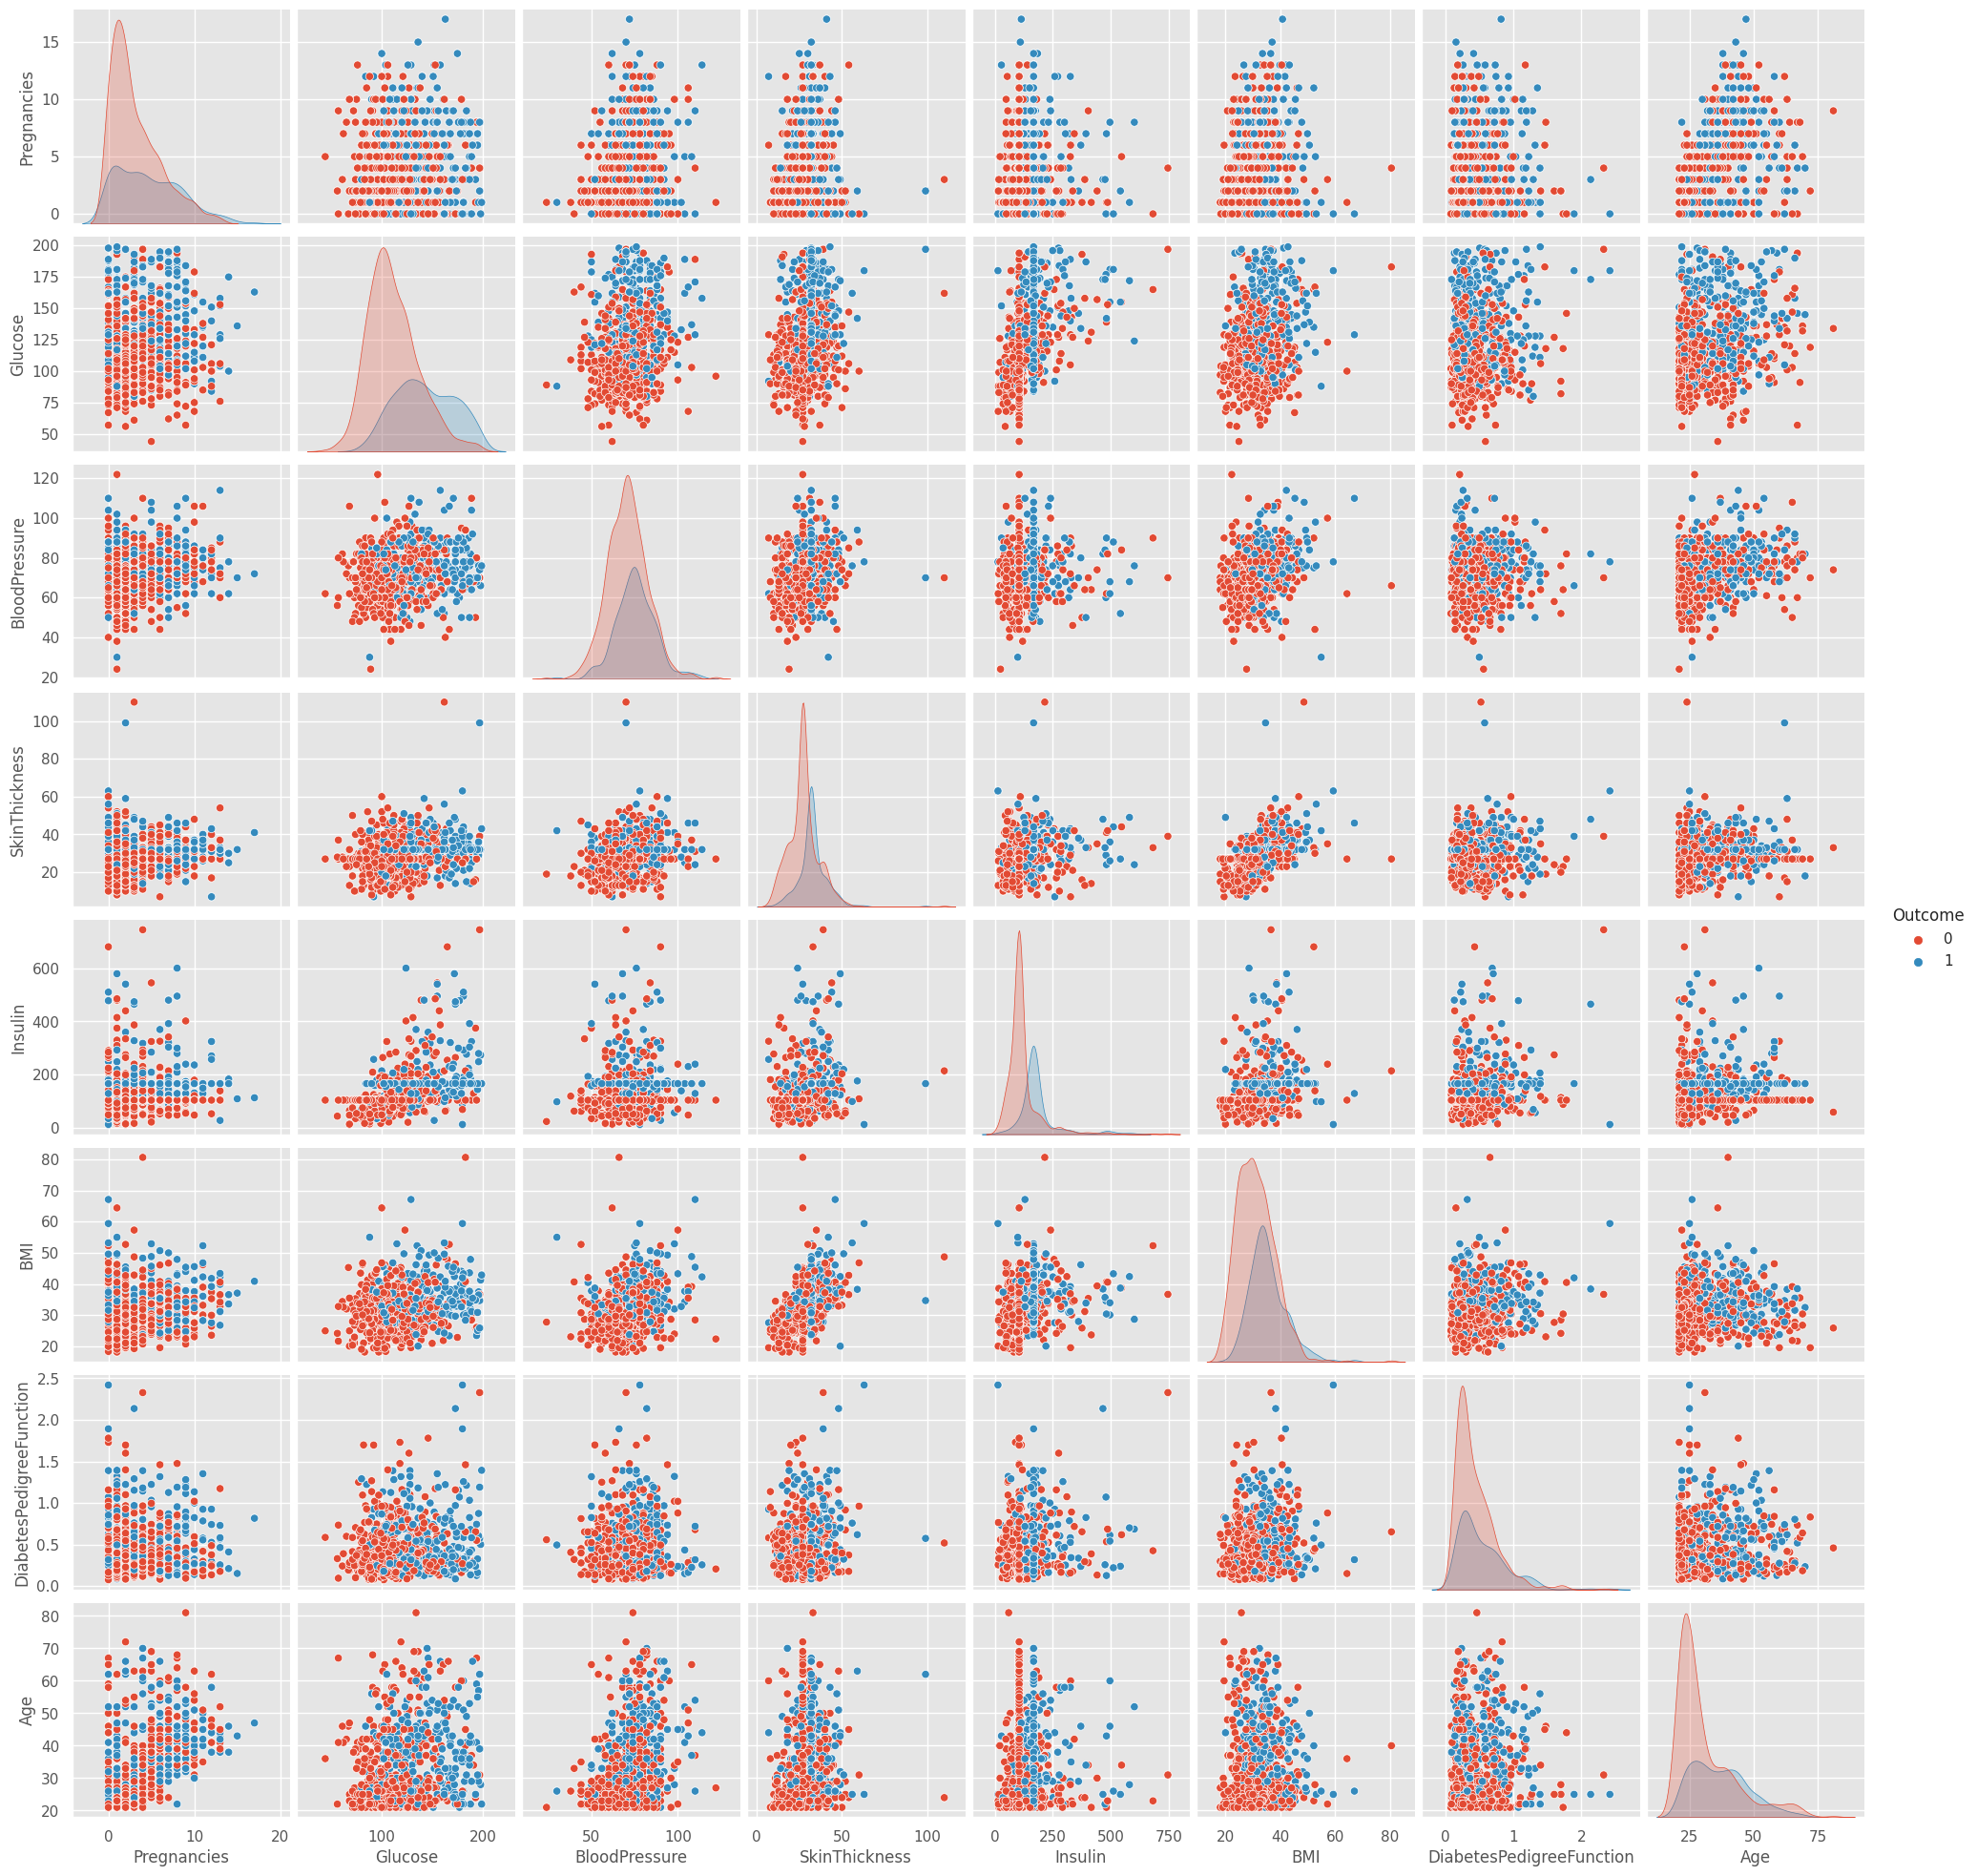

In [35]:
p=sns.pairplot(df, hue = 'Outcome')

## Outlier Observation Analysis

In [36]:
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


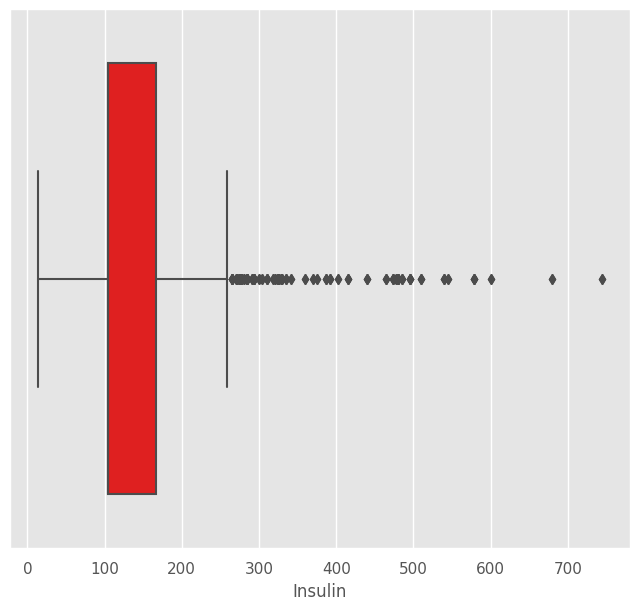

In [37]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

In [38]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

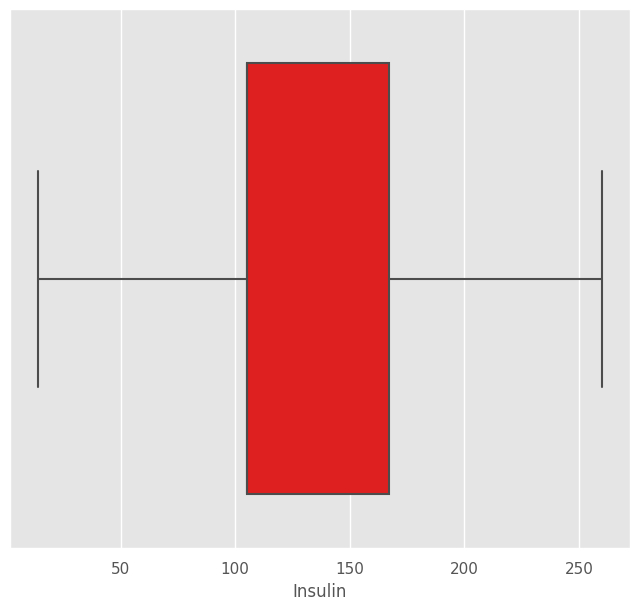

In [39]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

## Local Outlier Factor (LOF)

In [40]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1, ...,  1, -1,  1])

In [41]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.82766102, -2.82766102, -2.49702466, -2.49702466, -2.49702466,
       -2.39201651, -2.39201651, -2.14124487, -2.14124487, -2.00788379,
       -2.00788379, -2.00788379, -1.97049746, -1.97049746, -1.93263345,
       -1.93263345, -1.76919602, -1.76919602, -1.70394288, -1.70394288,
       -1.70394288, -1.64602702, -1.64602702, -1.63263054, -1.63263054,
       -1.62330203, -1.62330203, -1.62330203, -1.61950946, -1.61950946])

In [42]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-2.1412448748237654

In [43]:
# Deleting those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [44]:
# Examining the size of the data.
df.shape

(1991, 9)

## Feature Engineering

Creating new variables is important for models. But we need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [45]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,Obesity 1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,Obesity 2
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,Obesity 3
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,Obesity 3
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,Obesity 3


In [47]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [48]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,Obesity 1,Abnormal
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,Obesity 2,Normal
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,Obesity 3,Abnormal
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,Obesity 3,Abnormal
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,Obesity 3,Abnormal


In [49]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,Obesity 1,Abnormal,Secret
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,Obesity 2,Normal,Normal
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,Obesity 3,Abnormal,Secret
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,Obesity 3,Abnormal,Secret
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,Obesity 3,Abnormal,Secret


## One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [51]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,1,0,0,0,0,0,0,0,0,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,0,1,0,0,0,1,0,1,0,0
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,0,0,1,0,0,0,0,0,0,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,0,0,1,0,0,0,0,0,0,1
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,0,0,1,0,0,0,0,0,0,1


In [53]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [54]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1


In [55]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [56]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21


In [57]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as "Normalize", "MinMax", "Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [58]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.2,0.500000,-0.6250,1.000000,1.000000,0.142857,-0.650000,1.1250
1,-0.6,-0.785714,0.6250,0.428571,0.322581,0.648352,-0.371053,-0.3750
2,-0.6,0.666667,0.1875,0.571429,1.000000,1.307692,0.673684,0.1250
3,-0.6,0.428571,-0.2500,2.000000,2.338710,1.098901,-0.023684,-0.3125
4,-0.4,0.523810,-0.6250,1.857143,2.500000,0.923077,0.426316,-0.5000


In [59]:
X = pd.concat([X,categorical_df], axis = 1)

In [60]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,-0.2,0.500000,-0.6250,1.000000,1.000000,0.142857,-0.650000,1.1250,1,0,0,0,0,0,0,0,0,1
1,-0.6,-0.785714,0.6250,0.428571,0.322581,0.648352,-0.371053,-0.3750,0,1,0,0,0,1,0,1,0,0
2,-0.6,0.666667,0.1875,0.571429,1.000000,1.307692,0.673684,0.1250,0,0,1,0,0,0,0,0,0,1
3,-0.6,0.428571,-0.2500,2.000000,2.338710,1.098901,-0.023684,-0.3125,0,0,1,0,0,0,0,0,0,1
4,-0.4,0.523810,-0.6250,1.857143,2.500000,0.923077,0.426316,-0.5000,0,0,1,0,0,0,0,0,0,1


In [61]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [62]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [63]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LR

In [64]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [65]:
# model predictions

y_pred = log_reg.predict(X_test)

In [66]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.8377602297200287
0.8528428093645485


In [67]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[359  50]
 [ 38 151]]


In [68]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       409
           1       0.75      0.80      0.77       189

    accuracy                           0.85       598
   macro avg       0.83      0.84      0.83       598
weighted avg       0.86      0.85      0.85       598



# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
# model predictions

y_pred = knn.predict(X_test)

In [71]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9253409906676239
0.8678929765886287


In [72]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[369  40]
 [ 39 150]]


In [73]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       409
           1       0.79      0.79      0.79       189

    accuracy                           0.87       598
   macro avg       0.85      0.85      0.85       598
weighted avg       0.87      0.87      0.87       598



# SVM

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [75]:
# best parameters

grid_search.best_params_

{'C': 20, 'gamma': 0.1}

In [76]:
# best score

grid_search.best_score_

0.9389804285603776

In [77]:
svc = SVC(C = 1, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [78]:
# model predictions

y_pred = svc.predict(X_test)

In [79]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9339554917444365
0.9163879598662207


In [80]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[378  31]
 [ 19 170]]


In [81]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       409
           1       0.85      0.90      0.87       189

    accuracy                           0.92       598
   macro avg       0.90      0.91      0.90       598
weighted avg       0.92      0.92      0.92       598



# DT

In [82]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.959866220735786 

Confusion Matrix :- 
[[391  18]
 [  6 183]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       409
           1       0.91      0.97      0.94       189

    accuracy                           0.96       598
   macro avg       0.95      0.96      0.95       598
weighted avg       0.96      0.96      0.96       598



In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Assuming 'dtc' is your DecisionTreeClassifier, and 'X_train' and 'y_train' are your training data
dtc = DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [2, 3, 5, 7],  # Adjusted min_samples_split values
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv=50, n_jobs=-1, verbose=1)
grid_search_dtc.fit(X_train, y_train)


Fitting 50 folds for each of 960 candidates, totalling 48000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [84]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.961190476190476


In [85]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9777458722182341
Test Accuracy of Decision Tree Classifier is 0.9515050167224081 

Confusion Matrix :- 
[[391  18]
 [ 11 178]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       409
           1       0.91      0.94      0.92       189

    accuracy                           0.95       598
   macro avg       0.94      0.95      0.94       598
weighted avg       0.95      0.95      0.95       598



# RF

In [86]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [87]:
y_pred = rand_clf.predict(X_test)

In [88]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9992821249102656
0.979933110367893


In [89]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[399  10]
 [  2 187]]


In [90]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       409
           1       0.95      0.99      0.97       189

    accuracy                           0.98       598
   macro avg       0.97      0.98      0.98       598
weighted avg       0.98      0.98      0.98       598



# GBDT

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [95]:
# best parameters

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 200}

In [96]:
# best score

grid_search_gbc.best_score_

0.9798818088386433

In [97]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', n_estimators=180)

In [98]:
y_pred = gbc.predict(X_test)

In [99]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9985642498205313
0.9849498327759197


In [100]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[402   7]
 [  2 187]]


In [101]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       409
           1       0.96      0.99      0.98       189

    accuracy                           0.98       598
   macro avg       0.98      0.99      0.98       598
weighted avg       0.99      0.98      0.99       598



# XGBoost

In [102]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
y_pred = xgb.predict(X_test)

In [104]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9971284996410624
0.9715719063545151


In [105]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[398  11]
 [  6 183]]


In [106]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       409
           1       0.94      0.97      0.96       189

    accuracy                           0.97       598
   macro avg       0.96      0.97      0.97       598
weighted avg       0.97      0.97      0.97       598



# Model Comparison

In [107]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,98.49
4,Random Forest Classifier,97.99
6,XgBoost,97.16
3,Decision Tree Classifier,95.15
2,SVM,91.64
1,KNN,86.79
0,Logistic Regression,85.28


In [108]:
import pickle
model = rand_clf
pickle.dump(model, open(r"C:\Users\nishi\Desktop\Downloads\Medibuddy-Smart-Disease-Predictor-main\Medibuddy-Smart-Disease-Predictor-main\models\diabetes.pkl",'wb'))

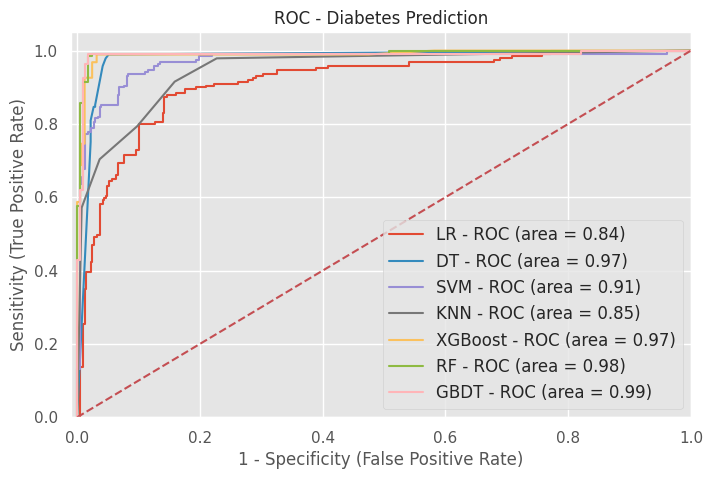

In [109]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig(r"C:\Users\nishi\Desktop\Downloads\Medibuddy-Smart-Disease-Predictor-main\Medibuddy-Smart-Disease-Predictor-main\outputs\roc_diabetes.jpg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[85.28, 95.15, 91.64, 86.79, 97.16, 97.99, 98.49]
[83.83, 95.95, 91.18, 84.78999999999999, 97.07000000000001, 98.11, 98.61999999999999]


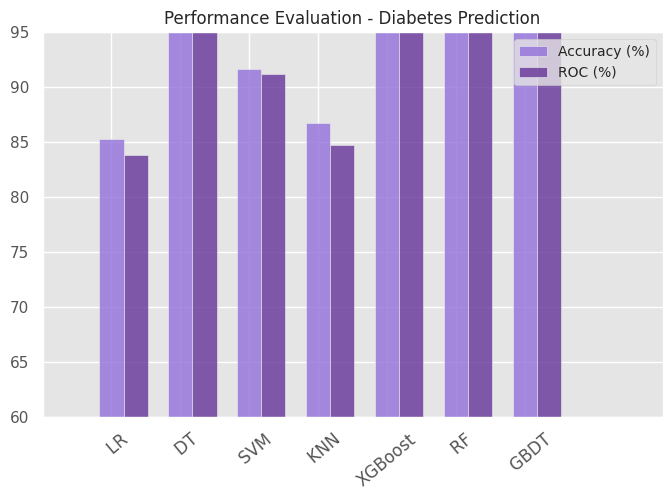

In [110]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig(r"C:\Users\nishi\Desktop\Downloads\Medibuddy-Smart-Disease-Predictor-main\Medibuddy-Smart-Disease-Predictor-main\outputs\pe_diabetes.jpg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()